<p align="left">
  <img src="./logo_UTN.svg" />
</p>


# **Teoría de Circuitos II - R4001 - 2023**
## Trabajo Semanal 4bis
### Autor: Bruno Glecer

# Consigna

La tarea semanal consiste en diseñar un filtro pasa-banda con las siguientes caracteristicas

- Frecuencia de corte inferior $f_{ci} = 1600\mathrm{kHz}$
- Frecuencia de corte superior $f_{cs} = 2500\mathrm{kHz}$
- Ripple maximo en la banda de paso: $3\mathrm{dB}$
- Maxima planicidad en la banda de paso
- Ganancia maxima en la banda de paso: $10\mathrm{dB}$
- Atenuacion minima de $\alpha_{min} = 20\mathrm{dB}$ a las frecuencias $1250\mathrm{kHz}$ y $3200\mathrm{kHz}$

Se piden las siguientes consignas:

1. Obtener la funcion de transferencia normalizada del filtro
2. Graficar el diagrama de polos y ceros
3. Graficar la transferencia (modulo y fase) del filtro pedido
4. Sintetizar el filtro utilizando estructuras Ackeberg-Mossberg
5. Simular el filtro obtenido, verificando las especificaciones de diseño.



# 1. Transferencia

Comenzamos normalizando los parametros del filtro usando la frecuencia central $\omega_0 = \sqrt{\omega_{ci} \omega_{cs}}$ como norma para diseñar el pasabajos prototipo y luego aplicar la transformacion en frecuencia utilizando el nucleo $p = K(s) = Q\dfrac{s^2 + 1}{s}$

In [112]:
import numpy as np

#Uso los nombres de f_1 y f_2 para las frecuencias de paso y f_s1 y f_s2 para las frecuencias de corte

f_p1 = 1600*10**3
f_p2 = 2500*10**3

f_s1 = 1250*10**3
f_s2 = 3200*10**3

alpha_max = 3
alpha_min = 20

ganancia_max = 10

#Caluclos de los parametros del filtro

f_0 = np.sqrt(f_p1*f_p2)
bw = f_p2 - f_p1
q_filtro = f_0/bw

#Paso a frecuencia angular y normalizo

w_norma = f_0 * 2*np.pi

w_0  = 1

w_p1 = f_p1 * 2*np.pi / w_norma
w_p2 = f_p2 * 2*np.pi / w_norma

w_s1 = f_s1 * 2*np.pi / w_norma
w_s2 = f_s2 * 2*np.pi / w_norma

print(f"Frecuencias de paso: ({w_p1} a  {w_p2})")
print(f"Frecuencias de corte: ({w_s1}  a  {w_s2})")


Frecuencias de paso: (0.7999999999999999 a  1.2500000000000002)
Frecuencias de corte: (0.6250000000000001  a  1.5999999999999999)


Para obtener los parametros del filtro prototipo que debemos diseñar, tenemos que elegir los valores de frecuencia tal que imponga las restricciones mas fuertes en el caso de que la plantilla no sea simetrica.

In [122]:
#Transformo los parametros del filtro pasabanda al filtro prototipos usando el nucleo de transformacion:

def nucleo_wi(w):
    return q_filtro*((w**2 - 1)/w) #El nucleo es diferente al definido porque esta formula es para transformar el valor absoluto de frecuencia imaginaria, no compleja.

w_p1_lp = nucleo_wi(w_p1)
w_p2_lp = nucleo_wi(w_p2)

w_s1_lp = nucleo_wi(w_s1)
w_s2_lp = nucleo_wi(w_s2)


print(f"Opciones de frecuencia de paso prototipo: ({w_p1_lp} ,  {w_p2_lp})")
print(f"Opciones de frecuencia de corte prototipo: ({w_s1_lp}  ,  {w_s2_lp})")

w_p_lp = min(abs(w_p1_lp), abs(w_p2_lp))
w_s_lp = min(abs(w_s1_lp), abs(w_s2_lp))
print()
print(f"Frecuencia de paso prototipo: {w_p_lp}")
print(f"Frecuencia de corte prototipo: {w_s_lp}")


Opciones de frecuencia de paso prototipo: (-1.0000000000000004 ,  1.000000000000001)
Opciones de frecuencia de corte prototipo: (-2.1666666666666656  ,  2.1666666666666665)

Frecuencia de paso prototipo: 1.0000000000000004
Frecuencia de corte prototipo: 2.1666666666666656


Como es de esperar, la frecuencia de paso resulta igual a 1 debido a la normaizacion inicial. El filtro prototipo se debe diseñar para que el ripple maximo en la banda de paso sea de $\alpha_{max} = 3\mathrm{dB}$ y una atenuacion en la frecuencia de corte minima de $\alpha_{min} = 20dB$. Pasamos entonces a calcular los parametros del filtro prototipo.

Es importante tener en cuenta que al exigir una ganancia maxima de $10\mathrm{dB}$ en la banda de paso tendra la consecuencia de tener un valor $K$ en la transferencia final mayor a uno. Esto causará que toda respuesta suba por $10\mathrm{dB}$, incluyendo la ganancia en las frecuencias de corte. Para seguir cumpliendo con el requisito de atenuacion, es importante exigirle $10\mathrm{dB}$ extra de atenuacion en las frecuencias de corte.

In [123]:
#Calculo de epsilon

epsilon = np.sqrt(10**(alpha_max/10) - 1)

#Calculo de orden

n = 1

alpha_min_diseno = alpha_min + ganancia_max #Exigo ganancia_max mas de atenuacion


while (10*np.log10(1 + epsilon**2 * w_s_lp ** (2*n))) < alpha_min_diseno:
    n += 1
    
alpha_ws = 10*np.log10(1 + epsilon**2 * w_s_lp ** (2*n)) - ganancia_max #En el filtro final, la atenuacion sera reducida por ganancia_max

    
print(f"epsilon = {epsilon}   n = {n}   alpha_ws = {alpha_ws}")

epsilon = 0.9976283451109834   n = 5   alpha_ws = 23.56049930002674


El filtro al tener una atenuacion maxima en la banda de paso de 3dB, corresponde a un filtro Butterworth ($\varepsilon=1$), entonces no es necesario desnormalizar con la frecuencia de Butterworth.

Continuamos calculando los polos del filtro utilizando la propiedad de separacion angular constante entre los polos de un filtro de maxima planicidad.

$T_{LP}(p) = \dfrac{1}{\left(p + 1\right) \left(p^2 + 2 cos \left(\dfrac{\pi}{5}\right)p + 1 \right) \left(p^2 + 2 cos \left(\dfrac{2\pi}{5}\right)p + 1 \right)}$

Remplazando $p$ por el nucleo de transformacion, podemos encontrar la transferencia del filtro pasabanda. Para agilizar este trabajo, haremos uso de la libreria sympy para la manipulacion algebraica.



In [147]:
from sympy.abc import p, s, T, Q
from IPython.display import display
import sympy

def round_expr(expr, num_digits):
    return expr.xreplace({n : round(n, num_digits) for n in expr.atoms(sympy.Number)})

K = 10**(ganancia_max/20)

transferencia_lp = sympy.Eq(T, 1/((p+1)*(p**2 + 2*np.cos(np.pi/5)*p + 1)*(p**2 + 2*np.cos(2*np.pi/5)*p + 1)))
relacion_p_s = sympy.Eq(p, q_filtro * (s**2 + 1)/s)

transferencia = sympy.solve([transferencia_lp, relacion_p_s], [T, p], dict=True)[0][T]

numerador = sympy.fraction(transferencia, s)[0]
denominador = sympy.fraction(transferencia, s)[1]

numerador = sympy.expand(numerador)
denominador = sympy.expand(denominador)


denominador_coef_principal = sympy.expand(denominador).coeff(s,2*n)

numerador /= denominador_coef_principal
denominador /= denominador_coef_principal

transferencia = numerador/denominador

transferencia = K*transferencia

display(round_expr(transferencia, 4))


0.0584*s**5/(1.0*s**10 + 1.4562*s**9 + 6.0603*s**8 + 6.3021*s**7 + 13.3136*s**6 + 9.7101*s**5 + 13.3136*s**4 + 6.3021*s**3 + 6.0603*s**2 + 1.4562*s + 1.0)

Para verificar el resultado anterior podemos utilizar las funciones de sintesis de filtros de scipy.

In [170]:
from scipy import signal
from IPython.display import display
from pytc2.sistemas_lineales import analyze_sys, pretty_print_bicuad_omegayq,tfcascade,pretty_print_lti


t_num, t_den = signal.butter(n, [w_p1, w_p2], btype='bandpass', analog=True)

t_num[0]*=K

pretty_print_lti(t_num, t_den)

<IPython.core.display.Math object>

Como vemos, ambas transferencias son numericamente identicas, confirmando nuestro resultado anterior.

# 2/3. Diagramas de polos y ceros y transferencia

Utilizamos la libreria de pytc2 para realizar el analisis

(2, <Axes: xlabel='$\\sigma$', ylabel='j$\\omega$'>)

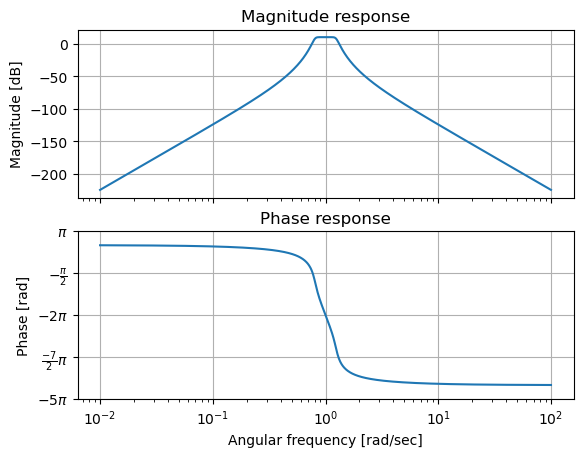

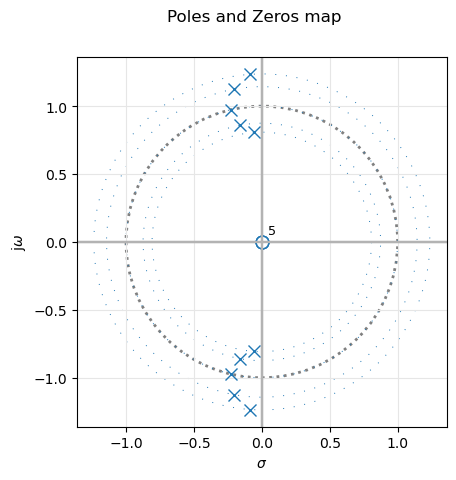

In [119]:
t = signal.TransferFunction(t_num, t_den)
from pytc2.sistemas_lineales import analyze_sys, pretty_print_bicuad_omegayq,tfcascade,pretty_print_lti, bodePlot, pzmap

bodePlot(t)
pzmap(t)

Al ser un filtro de orden muy elevado, es facil apreciar en el diagrama de polos y ceros la formacion en forma de semicircunferencia en la que se encuentran los polos del filtro alrededor de los puntos de corte de frecuencia.

# 4. Sintesis con estructura Ackerberg-Mossberg

Para realizar la sintesis es importante separar la transferencia en etapas de segundo y primer orden. En este caso el filtro al ser de orden 10, resulta en 5 estructuras de segundo orden, todas pasa altos.

In [207]:
from pytc2.sistemas_lineales import tf2sos_analog
t_sos = tf2sos_analog(t_num, t_den)


i = 0
omega_0_etapa = []
q_etapa = []
k_etapa = []

for etapa in t_sos:
    i+=1

    omega_0_etapa.append( np.sqrt(etapa[5]) )
    q_etapa.append( np.sqrt(etapa[5])/etapa[4] )
    k_etapa.append( (etapa[1]) )
    #print(f"Etapa {i}:")
    pretty_print_lti(etapa[:3], etapa[3:])
n_etapas = i
    
print()
for i in range(n_etapas):
    print(f"Etapa {i+1} :  omega_0={omega_0_etapa[i]}     q={q_etapa[i]}     k={k_etapa[i]}")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


Etapa 1 :  omega_0=1.0000000000000344     q=2.222222222223029     k=1.4531396745556755
Etapa 2 :  omega_0=0.8745411428856967     q=2.7715362358210727     k=0.3508154079877759
Etapa 3 :  omega_0=1.1434567808900447     q=2.771536235821898     k=0.5853273573572225
Etapa 4 :  omega_0=1.237226978252877     q=7.354813433977212     k=0.31606712873765874
Etapa 5 :  omega_0=0.8082591291471144     q=7.354813433979513     k=0.6187260408810356


La estructura Ackerberg-Mossberg pasa banda se trata de la siguiente red:

<div>
    <img src="ack_mos.png" width="700"/>
</div>

Esta tiene la siguiente transferencia (normalizada respecto de su $\omega_0$):

$T(s) = \dfrac{K s}{s^2 + \dfrac{1}{Q}s + 1}$

Para automatizar el trabajo de pasar todos esos valores a LTSpice se puede utilizar un script para generar el directivo entero

In [226]:
directivo = ""

z_norma = 1000

digits=3

for i in range(n_etapas):

    r = z_norma
    rq = z_norma * q_etapa[i]
    rk = z_norma / k_etapa[i]
    c = 1/(z_norma * w_norma * omega_0_etapa[i])
    
    directivo += f".param r{i+1}={r} rq{i+1}={rq} rk{i+1}={rk} c{i+1}={c} \n"

print(directivo)



.param r1=1000 rq1=2222.222222223029 rk1=688.1650934936923 c1=7.957747154594492e-11 
.param r2=1000 rq2=2771.5362358210728 rk2=2850.5019370039895 c2=9.099339944530032e-11 
.param r3=1000 rq3=2771.5362358218977 rk3=1708.445688435001 c3=6.959377291374852e-11 
.param r4=1000 rq4=7354.813433977212 rk4=3163.8848493796313 c4=6.431921785145782e-11 
.param r5=1000 rq5=7354.813433979512 rk5=1616.2241992854365 c5=9.84553946577985e-11 



A continuacion se muestran las cinco estructuras Ackerberg-Mossberg implementadas en LTSpice, junto con sus directivos que contienen los valores para cada etapa

## Simulacion

<div>
    <img src="sim.png" width="1000"/>
</div>

## Respuesta en frecuencia

La simulacion del circuito resulto en la siguiente transferencia y mediciones

<div>
    <img src="sim_res.png" width="700"/>
</div>

## Mediciones en puntos cirticos

```
t_ripple: PP(v(vo5)/v(vi))=(3.03871dB,-87.1735°) FROM 1.6e+06 TO 2.5e+06
t_fp1: v(vo5)/v(vi)=(-23.5924dB,-178.336°) at 1.25e+06
t_fp2: v(vo5)/v(vi)=(-23.6038dB,178.201°) at 3.2e+06
t_max: MAX(v(vo5)/v(vi))=(9.96982dB,-132.194°) FROM 1.6e+06 TO 2.5e+06
```

Se utilizaron 4 directivos para tomar las siguientes mediciones: Ripple en banda de paso, atenuacion en las frecuencias de corte y ganancia maxima en la banda de paso.
Las tres mediciones corresponden con gran exactitud a los valores planteados originalmente, 

